# Exercices Khaliq Aghakarimov

### Periodic function Khaliq Aghakarimov

In [0]:
%reset -f

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

np.set_printoptions(linewidth=500,precision=3,suppress=True)
plt.style.use("default")

### Exo Khaliq Aghakarimov

Give the period and the frequency of the following functions:

*  $(1\heartsuit\spadesuit)$ $t \to \sin(4*2\pi*t)$ $\longrightarrow \frac{1}{4}$ (4 Hz)
* $(1\heartsuit\spadesuit)$ $t \to \sin(4*t)$ $\longrightarrow \frac{\pi}{2}$ ($\frac{2}{\pi}$ Hz)
*  $(1\heartsuit\spadesuit)$ $t \to \sin(4*2\pi*t)+\sin(7*2\pi*t)$. Plot the this one, in such way we see its periodicity. $\longrightarrow1$ (1 Hz)
* $(1\heartsuit\spadesuit)$ $t \to \sin(4*2\pi*t)+\sin(7*t)$ $\longrightarrow $ Not periodic.


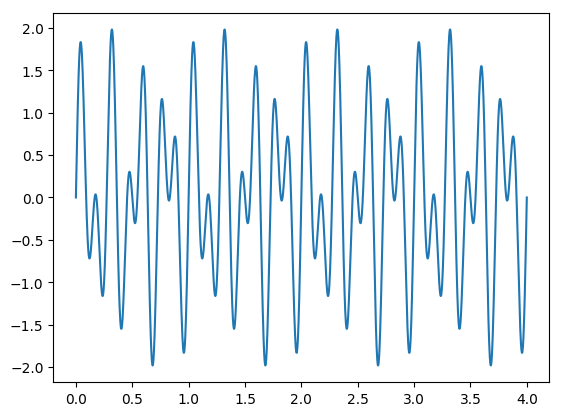

In [0]:
t = np.linspace(0, 4, 2000)
yy = np.sin(4*2*np.pi*t) + np.sin(7*2*np.pi*t)
plt.plot(t,yy);

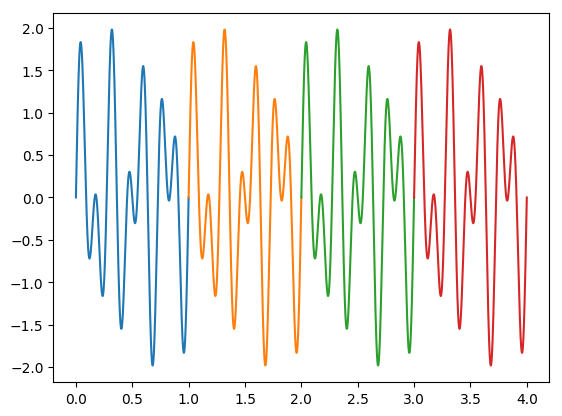

In [0]:
for k in range(4):
    t = np.linspace(k, k+1, 2000)
    yy = np.sin(4*2*np.pi*t) + np.sin(7*2*np.pi*t)
    plt.plot(t,yy);

### A dot product  Khaliq Aghakarimov


For $f$ and $g$ signals on $[0,T]$, we define:
$$
 \mathtt{dot}(f,g) = \frac 2 T \int_0^T f(t) g(t) \, dt
$$



### Exo Khaliq Aghakarimov

Explain why the following function gives an approximation of the dot product.

In [0]:
"""the informatic version of the scalar product. 
The integral is approximate by a sum"""
def dot(f,g):
    return 2*np.sum(f*g)/len(f)

***Solution:*** 
if we denote by 'step' the interval between two discretization points, we have

         2*np.sum(f*g)/len(f) = 2/T*np.sum(f*g)*step

And 

    np.sum(f*g)*step
    
is an approximation on the integral by the rectangle formula.


### sin-cos family Khaliq Aghakarimov


We define now some special functions on $[0,T]$:
\begin{align*}
\sin_n(t)& =\sin(2\pi \frac {nt} T),  \qquad \forall n\geq 1 \\
\cos_{n}(t) & =\cos(2\pi \frac {nt} T),  \qquad \forall n\geq 1
\end{align*}

We want to stack all this functions  in one family,  together with the constant function $t \to  \frac 1 {\sqrt 2}$. So we write:
\begin{align*}
sc_0(t)&= \frac 1 {\sqrt 2}\\
sc_{2i-1}(t)& =\sin_i(t),  \qquad \forall i\geq 1 \\
sc_{2i}(t) & =\cos_i(t),  \qquad \forall i\geq 1
\end{align*}


The infinite familly $(sc_n)_{n\in \mathbb N} $ is called the sinCos family. As we will check, it is an orthonormal family for our dot product. 


### Exo : Khaliq Aghakarimov

Define all the sin/cos functions, and stack their into a matrix. Plot them and check the orthonolality


In [0]:
"""The begin of the sinCos family, stacked in a matrix. 
The n-th line is the discretization of sc_n(t)"""

def compute_sinCos_basis(t,T,M):
    """
    Args:
         t (1d-array) : time discretized
         T (int) : Duration 
         M (int) : number of different frequencies, so the size of the basis is 2N+1
    """

    basis_sc=np.empty([2*M+1,len(t)])
    basis_sc[0]=np.ones_like(t)/np.sqrt(2)
    for i in range(1,M+1):    
        basis_sc[2*i-1,:]=np.sin(i*2*np.pi*t/T)
        basis_sc[2*i,:]=np.cos(i*2*np.pi*t/T)
        
    return basis_sc

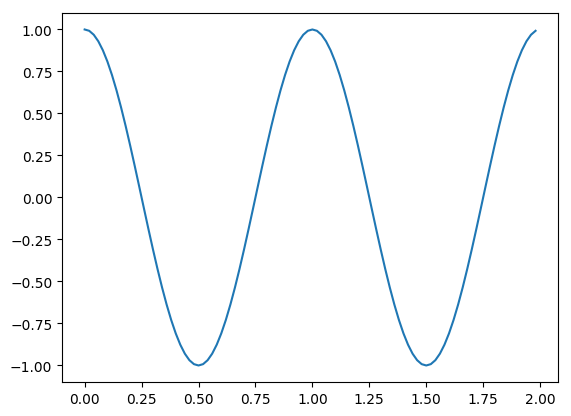

In [0]:
T=2
t=np.linspace(0,T,100,endpoint=False)

basis_sc=compute_sinCos_basis(t,T,10)

""" we plot one wave = 1 line of the basis  """
plt.plot(t,basis_sc[4,:]);

In [0]:
"""compute some dot-product to check the orthonormality"""
nb=10
many_dot_products=np.empty([nb,nb])

for i in range(nb):
    for j in range(nb):
        many_dot_products[i,j]=dot(basis_sc[i,:],basis_sc[j,:])
        
print(many_dot_products)

[[ 1. -0. -0.  0. -0.  0. -0. -0. -0. -0.]
 [-0.  1.  0. -0.  0. -0.  0. -0. -0. -0.]
 [-0.  0.  1.  0.  0.  0.  0. -0.  0.  0.]
 [ 0. -0.  0.  1. -0. -0. -0. -0.  0. -0.]
 [-0.  0.  0. -0.  1. -0.  0.  0. -0. -0.]
 [ 0. -0.  0. -0. -0.  1.  0. -0. -0.  0.]
 [-0.  0.  0. -0.  0.  0.  1. -0.  0. -0.]
 [-0. -0. -0. -0.  0. -0. -0.  1. -0.  0.]
 [-0. -0.  0.  0. -0. -0.  0. -0.  1.  0.]
 [-0. -0.  0. -0. -0.  0. -0.  0.  0.  1.]]


Faster solution, with matrix product

In [0]:
print( (2/len(t)*basis_sc@basis_sc.T)[nb:,nb:])

[[ 1.  0. -0.  0. -0.  0.  0. -0.  0. -0. -0.]
 [ 0.  1.  0.  0.  0. -0. -0.  0.  0.  0.  0.]
 [-0.  0.  1. -0. -0. -0. -0.  0.  0.  0. -0.]
 [-0.  0. -0.  1. -0.  0.  0.  0. -0. -0.  0.]
 [-0.  0. -0. -0.  1.  0. -0.  0. -0.  0.  0.]
 [ 0. -0. -0.  0.  0.  1.  0. -0. -0.  0.  0.]
 [ 0. -0. -0.  0. -0.  0.  1.  0.  0.  0.  0.]
 [-0.  0.  0.  0.  0. -0.  0.  1.  0. -0.  0.]
 [ 0.  0.  0. -0. -0. -0.  0.  0.  1.  0.  0.]
 [-0.  0.  0. -0.  0.  0.  0. -0.  0.  1.  0.]
 [-0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  1.]]


*** Refaire le programme: *** en commençant avec la discrétisation imparfaire:  

    t=np.linspace(0,T,100,endpoint=True)




### sin-cos approximation  Khaliq Aghakarimov

Ici c'est le gros exo qui résume tout le cours. Rappel de cours: 

A signal $f$ can be decompose as an infinite sum of elements of the sinCos family:
$$
f(t)=\sum_{n\in \mathbb N} a_n \, sc_n(t)
$$
where, from the orthonormality, the coordinates $a_n$ have a simple expression:
$$
a_n= \mathtt{dot}(f,sc_n)
$$

In particular, a signal can be approximate by a finite sum of elements of the sinCos family:
$$
f(t) \simeq\sum_{n=0}^{2M+1} a_n \, sc_n(t) 
$$

### Exo  Khaliq Aghakarimov

Make a program where you approximate the 3 following functions with $N=2*M+1$ elements of the sinCos basis.

You can start exist $M=5$. 

* $t\to (t-1)^2$ 
* $t\to (t-1)^2+0.1*\sin(2\pi*100t)$. With this one, try to increase $M$ so the approximation capture the noise. 

* $t\to e^t$. Explain why the approximations are not so nice with this function.  





In [0]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

np.set_printoptions(linewidth=500,precision=3,suppress=True)
plt.style.use("default")

***Pour nous:*** On peut leur redonner les fonctions suivantes pour que cela aille plus vite. 

In [0]:
def compute_sinCos_basis(t,T,M):
    
    basis_sc=np.empty([2*M+1,len(t)])
    basis_sc[0]=np.ones_like(t)/np.sqrt(2)
    for i in range(1,M+1):    
        basis_sc[2*i-1,:]=np.sin(i*2*np.pi*t/T)
        basis_sc[2*i,:]=np.cos(i*2*np.pi*t/T)
        
    return basis_sc

def dot(f,g):
    return 2*np.sum(f*g)/len(f)


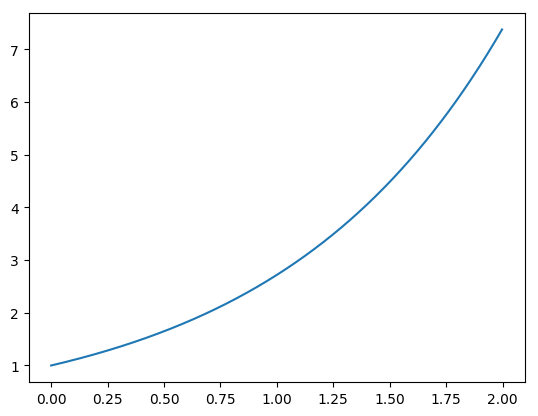

In [0]:
nb_points=1000
T=2
t=np.linspace(0,T,nb_points,endpoint=False)

#f=(t-1)**2 +0.05*np.sin(2*np.pi*20*t)
f=np.exp(t)
plt.plot(t,f);

In [0]:
M=50 #number of waves we use
basis_sc=compute_sinCos_basis(t,T,M)
basis_sc.shape

(101, 1000)

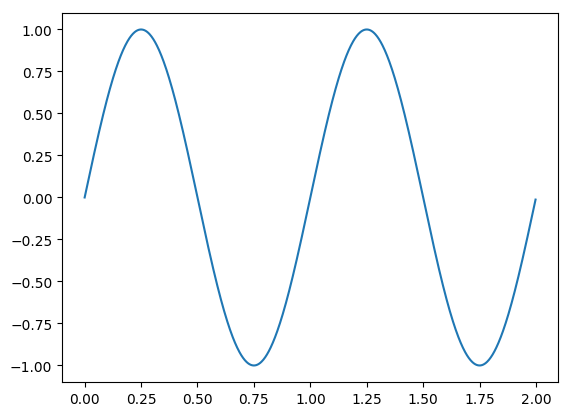

In [0]:
"""ici ils peuvent aussi tracer toutes éléments de la base"""
plt.plot(t,basis_sc[3,:]); 

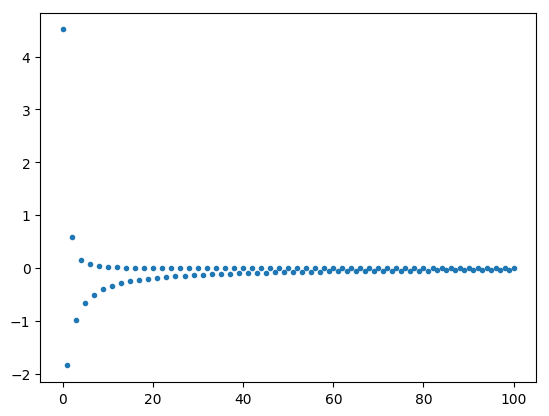

In [0]:
coordinates=np.empty(len(basis_sc))
for i in range(len(basis_sc)):
    coordinates[i]=dot(f,basis_sc[i,:])

    
plt.plot(range(len(basis_sc)),coordinates,".");


In [0]:
approximation=coordinates@basis_sc

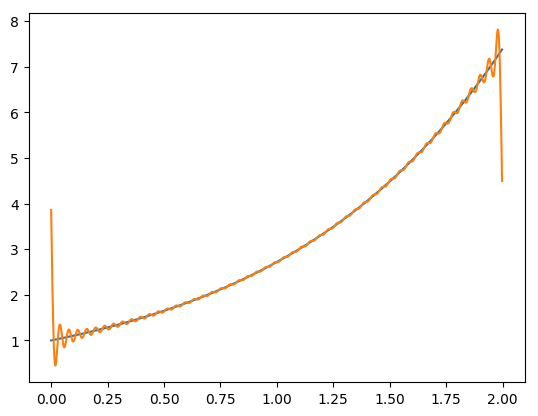

In [0]:
plt.plot(t,f)
plt.plot(t,approximation);